In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import math
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("drive/MyDrive/Quantum internship/internship_train.csv")

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


My first guess was to try using linear regression on the data. According to describe, the data needs to be normalized for linear regression. I also wanted to take a look at the relations between the data points. Sometimes we could apply some non-linear transformation to make the relation and linear and ready for usage in linear regressions.

In [4]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,1.000000,0.002009,0.001170,0.002957,-0.003764,-0.007362,0.007855,0.007174,0.008011,0.002339,...,-4.142468e-03,-6.524791e-03,0.003532,0.000310,-0.002639,0.004795,0.000287,-0.001647,-0.003612,0.002427
1,0.002009,1.000000,-0.001849,-0.004653,-0.002433,-0.002037,0.004181,0.005790,0.004095,0.002592,...,-2.874705e-03,-2.679358e-03,0.001402,-0.007900,-0.004497,0.002015,0.003119,0.006038,-0.003173,-0.005545
2,0.001170,-0.001849,1.000000,-0.000775,0.003082,-0.002161,0.002296,-0.000299,0.001983,0.005753,...,1.091757e-03,-5.881274e-04,0.000643,0.003106,0.001611,-0.001444,0.001006,-0.001753,0.002812,0.001003
3,0.002957,-0.004653,-0.000775,1.000000,-0.003623,-0.001038,0.000223,-0.004290,0.000966,0.000202,...,-5.875674e-03,4.776979e-03,0.001334,0.000528,0.006892,0.002790,0.002082,0.000373,0.002534,0.002807
4,-0.003764,-0.002433,0.003082,-0.003623,1.000000,-0.000992,0.005602,-0.004459,0.004763,-0.000778,...,-1.412970e-03,6.178204e-03,-0.000873,-0.002625,-0.001883,0.002884,-0.000702,0.001067,-0.002388,-0.001300
5,-0.007362,-0.002037,-0.002161,-0.001038,-0.000992,1.000000,-0.003869,-0.001455,-0.002289,0.004740,...,-1.159929e-03,-5.225882e-03,-0.000776,-0.000087,-0.004682,0.000988,0.004735,-0.004100,0.004946,-0.002125
6,0.007855,0.004181,0.002296,0.000223,0.005602,-0.003869,1.000000,-0.002051,0.940016,-0.007185,...,5.795666e-04,-3.255019e-05,0.005084,-0.002972,-0.002300,0.003611,0.001542,-0.000944,0.002867,0.000666
7,0.007174,0.005790,-0.000299,-0.004290,-0.004459,-0.001455,-0.002051,1.000000,0.000779,-0.007187,...,-5.102514e-03,2.936529e-03,0.003277,-0.001273,-0.000669,0.001930,0.001085,0.008363,0.001724,0.012103
8,0.008011,0.004095,0.001983,0.000966,0.004763,-0.002289,0.940016,0.000779,1.000000,-0.007370,...,3.567263e-04,-1.795987e-03,0.006837,-0.003748,-0.002903,0.004119,0.000960,0.000786,0.001725,0.000347
9,0.002339,0.002592,0.005753,0.000202,-0.000778,0.004740,-0.007185,-0.007187,-0.007370,1.000000,...,1.202068e-03,1.417241e-03,-0.002239,0.002636,0.004146,0.001255,-0.000016,-0.003785,-0.003467,0.001504


In [5]:
y = df["target"]
X = df.drop("target", axis = 1)

In [11]:
std_scaler = StandardScaler()
data = std_scaler.fit_transform(X)
X = pd.DataFrame(data)

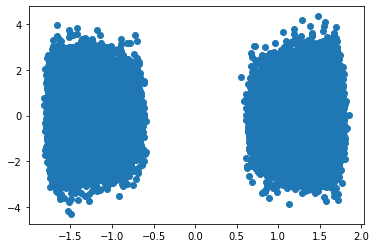

In [7]:
pca = PCA(n_components = 2).fit(data)
z = pca.transform(data)
plt.scatter(z[:,0],z[:,1])

In [8]:
print("First component raw:", pca.explained_variance_ratio_[0])
print("Second component raw:", pca.explained_variance_ratio_[1])

First component raw: 0.03662498560812299
Second component raw: 0.01934976007189105


The correlation matrix clearly shows no linear correlation between features and between features and target. I missed that part at first and plotted PCA. This PCA plot is useless as the varianve covered by two PCs is tiny. Actually, correlation matrix explains this plot, as if there is no linear correlation between data, PCA will perform poorly

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X,y,train_size = 0.8, random_state = 42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_val)


In [15]:
MSE = np.square(np.subtract(y_val,prediction)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)

29.015412891101402


In [17]:
print(prediction)
print(y_train.mean())

[50.37668967 50.13899805 50.72356471 ... 50.68354162 50.15812885
 52.2081811 ]
50.12849435386127


Anyway, I used linear regression to see what happens, and it just yields mean. The linear regression model is unable to learn any parameters, it does not fit, as there are no linear relations.
I had an idea to use SVM, but the results will be the same. It will not be able to learn.

In [27]:
df = pd.read_csv("drive/MyDrive/Quantum internship/internship_train.csv")
y = df["target"]
X = df.drop("target", axis = 1)
X_train, X_val, y_train, y_val = train_test_split(X,y,train_size = 0.6, test_size = 0.2, random_state = 42)

In [29]:
gsc = GridSearchCV(
            estimator=XGBRegressor(),
            param_grid={"learning_rate": (0.01, 0.03,0.05),
                        "max_depth": [3,4,5,6],
                        'n_estimators': [500,1000,2000]
            },
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [30]:
gsc.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
print(gsc.best_score_)
print(gsc.best_params_)

In [32]:
model = XGBRegressor(learning_rate = 0.03, max_depth = 4, n_estimators = 500)
model.fit(X_train, y_train)

[00:07:29] WARNING: ../src/learner.cc:767: 
Parameters: { "max_child_weight" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_child_weight=3,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [33]:
prediction = model.predict(X_val)
MSE = np.square(np.subtract(y_val,prediction)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)

0.026557919320650655


In [34]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [35]:
prediction = model.predict(X_val)
MSE = np.square(np.subtract(y_val,prediction)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)

0.04471444482714158


In [36]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
prediction = model.predict(X_val)
MSE = np.square(np.subtract(y_val,prediction)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)

0.005305362263599512


Random forest yields the perfect result, so I stopped investigating the data and testing different approaches and just took it. If I still received poor result, I could have investigated outliers and done some feature engineering and even try it with linear regression (add some squares, power of 3, sin and cos). I use colab for working, and it fell and I lost some information like grid search for xgboost, but at the previous iterations RF always worked better, so I decided to train it as my latest model, because of the perfect result it yields.

In [38]:
df = pd.read_csv("drive/MyDrive/Quantum internship/internship_train.csv")
test = pd.read_csv("drive/MyDrive/Quantum internship/internship_hidden_test.csv")
y = df["target"]
X = df.drop("target", axis = 1)

In [39]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
prediction = model.predict(test)


In [48]:
df_result = pd.DataFrame(prediction)
df_result.to_csv("prediction.csv")